# Snapshots

## Imports

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import itertools

from multiprocessing import Pool

In [2]:
%run config.py

## Valid

In [3]:
valid = pd.read_pickle(PATH_VALID_DEVICES, compression='gzip')

print('Devices:   %7d' % len(valid))
print('Snapshots: %7d' % valid.Count.sum())

Devices:      3953
Snapshots: 8830112


### Infos

#### 0. SDK levels

In [4]:
valid.SDK.astype(int) \
    .value_counts(dropna=False, normalize=True) \
    .apply(lambda x: np.round(x * 100, 2)) \
    .sort_index()

21     1.92
22     5.97
23    21.35
24    17.51
25     5.62
26    30.20
27    13.86
28     3.57
Name: SDK, dtype: float64

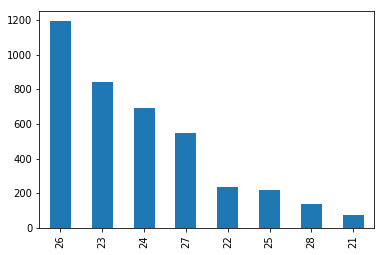

In [5]:
valid.SDK.astype(int).value_counts().plot(kind='bar')

#### 1. Counts

In [6]:
valid.Count.astype(int).describe()

count     3953.000000
mean      2233.774855
std       1725.236381
min        673.000000
25%       1040.000000
50%       1631.000000
75%       2656.000000
max      14257.000000
Name: Count, dtype: float64

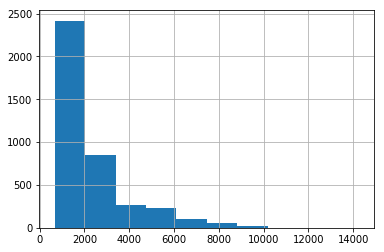

In [7]:
valid.Count.astype(int).hist()

#### 2. Manufacturers

In [8]:
manufacturers = valid.Manufacturer.apply(lambda x: x.lower()).value_counts(dropna=False, normalize=True)
manufacturers.apply(lambda x: np.round(x * 100, 2)).head(10)

samsung          63.22
lge               5.59
generalmobile     5.21
motorola          3.79
sony              3.11
oneplus           2.88
lenovo            2.18
xiaomi            2.12
vestel            1.75
htc               1.69
Name: Manufacturer, dtype: float64

In [9]:
len(manufacturers)

74

#### 3. Locales

In [10]:
locales = valid.Locale.value_counts(dropna=False, normalize=True)
locales.head(10)

tr_TR          0.568935
en_US          0.091323
en_GB          0.051100
es_US          0.050594
de_DE          0.047053
es_ES          0.027321
en_IN          0.019985
az_AZ_#Latn    0.017961
it_IT          0.013913
ru_RU          0.013408
Name: Locale, dtype: float64

In [11]:
len(locales)

76

In [12]:
locales_split = valid.Locale.apply(lambda x: x.split('_')[0]).value_counts(dropna=False, normalize=True)
locales_split.apply(lambda x: np.round(x * 100, 2)).head(10)

tr    57.22
en    17.76
es     9.89
de     5.34
az     2.88
it     1.39
ru     1.39
pt     1.16
in     0.56
fr     0.51
Name: Locale, dtype: float64

In [13]:
len(locales_split)

31

#### 4. Timezones

In [14]:
timezones = valid.Timezone.value_counts(dropna=False, normalize=True)
timezones.head(10)

Europe/Istanbul                   0.516064
Asia/Baku                         0.067797
Europe/Berlin                     0.043005
Asia/Kolkata                      0.035416
Asia/Calcutta                     0.021503
America/Mexico_City               0.018720
America/New_York                  0.015684
America/Argentina/Buenos_Aires    0.014925
Europe/Madrid                     0.014419
America/Bogota                    0.014166
Name: Timezone, dtype: float64

In [15]:
len(timezones)

158

In [16]:
timezones_split = valid.Timezone.apply(lambda x: x.split('/')[0]).value_counts(dropna=False, normalize=True)
timezones_split.apply(lambda x: np.round(x * 100, 2))

Europe       64.99
Asia         18.54
America      13.84
Africa        1.82
Australia     0.30
Etc           0.23
Pacific       0.18
Atlantic      0.08
GMT           0.03
Name: Timezone, dtype: float64

In [17]:
len(timezones_split)

9

#### 5. Diffs

In [18]:
valid.DiffMean.describe()

count    3953.000000
mean       17.744708
std         3.563459
min         5.270006
25%        15.689997
50%        16.757560
75%        18.556238
max        52.924250
Name: DiffMean, dtype: float64

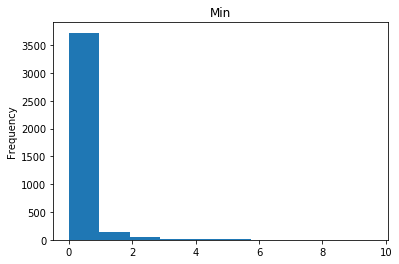

In [19]:
valid.DiffMin.plot(kind='hist', title='Min')

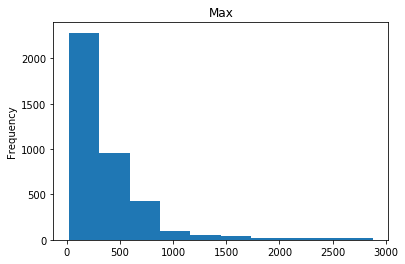

In [20]:
valid.DiffMax.plot(kind='hist', title='Max')

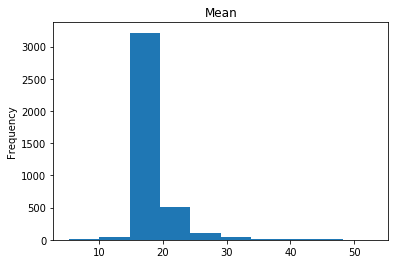

In [21]:
valid.DiffMean.plot(kind='hist', title='Mean')

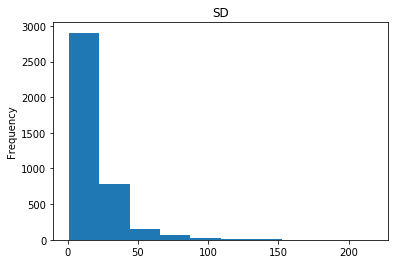

In [22]:
valid.DiffSD.plot(kind='hist', title='SD')

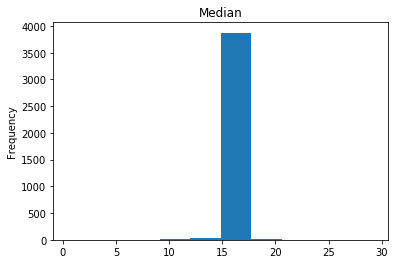

In [23]:
valid.DiffMedian.plot(kind='hist', title='Median')

#### 6. Durations

In [24]:
valid.Duration.describe()

count                        3953
mean      27 days 04:55:51.149479
std       20 days 21:31:15.777385
min        7 days 00:33:47.496000
25%       12 days 16:45:25.760000
50%       19 days 23:20:19.785000
75%       32 days 02:55:53.001000
max      109 days 19:25:24.862000
Name: Duration, dtype: object

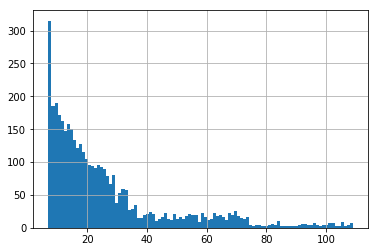

In [25]:
valid.Duration.dt.days.hist(bins=100)